<a href="https://colab.research.google.com/github/liao771018/liao771018/blob/main/OpenCV%E6%95%99%E5%AD%B81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install Pillow

In [ ]:
import cv2
import numpy as np

# colab 專用
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 本地端開一個 OpenCV 的視窗
# cv2.namedWindow('name')

# 讀取圖片 顯示圖片 及 圖片維度
image = cv2.imread('bg04.jpg', 1)

# cv2_imshow(image)
print(image.shape)

# 轉換圖片的類型
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2_imshow(image)

# 儲存圖片，設定參數 -> 壓縮的比率
cv2.imwrite('bg04-1.jpg',image ,[cv2.IMWRITE_JPEG_QUALITY, 100])



(875, 1400, 3)


True

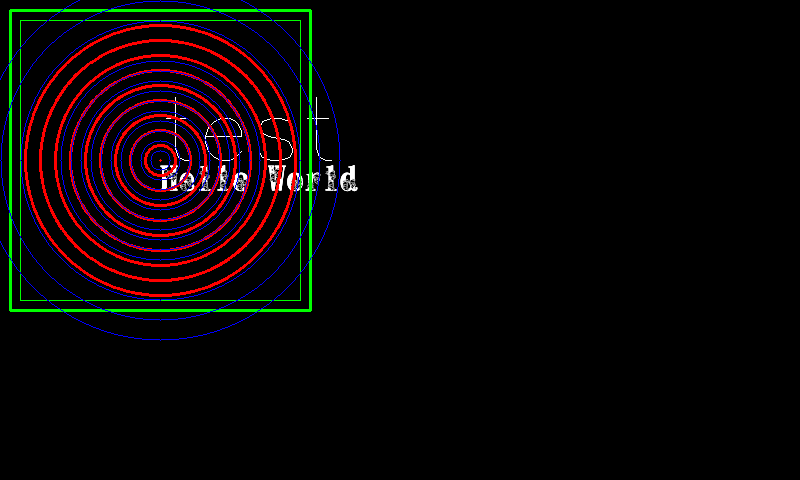

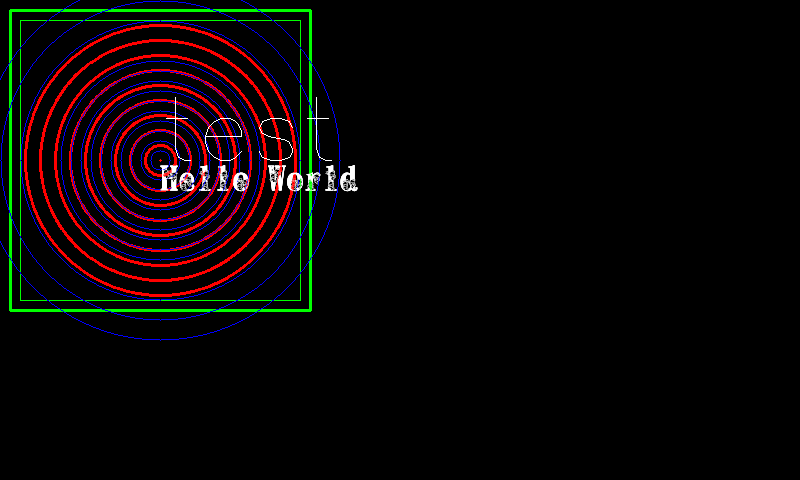

In [ ]:

# 建立一張圖片
# 變數   = np.full((維度一長度, 維度二長度...), 初始值, 陣列型態)
# 圖像變數 = np.full((高, 寬, 3), 初始顏色值, np.uint8)
image = np.full((480, 800, 3), (0,0,0), np.uint8)

# 在 image 的圖片上畫圖
# cv2.種類(圖像變數, 起點, 終點, 顏色, 線粗細), 種類 = (line, rectangle, cirle), 線粗細 = -1 會填滿
cv2.line(image, (10,10), (10,310), (0,255,0), 2)
cv2.line(image, (10,310), (310,310), (0,255,0), 2)
cv2.line(image, (310,310), (310,10), (0,255,0), 2)
cv2.line(image, (310,10), (10,10), (0,255,0), 2)

cv2.rectangle(image, (20,20), (300,300), (0,255,0), 1)

for i in range(10):

  cv2.circle(image, (160,160), i*10, (255,0,0), 1)
  cv2.circle(image, (160,160), i*10*2, (255,0,0), 1)
  cv2.circle(image, (160,160), i*15, (0,0,255), 2)

cv2_imshow(image)

cv2.putText(image, 'test', (160,160), cv2.FONT_ITALIC, 3, (255,255,255))

# 在圖片上寫字先匯入 Pillow 函示庫
from PIL import ImageFont, ImageDraw, Image

# 先轉成 PIL 物件 -> 寫字 -> 再轉回 OpenCV物件
# PIL圖像變數=Image.fromarray(OpenCV圖像變數)
pil = Image.fromarray(image)

# ImageDraw.Draw(PIL圖像變數).text(文字位置, 要寫的文字, 顏色, 設定(ImageFont.truetype(TTF字型檔位置, 文字大小))
ImageDraw.Draw(pil).text((160,160), 'Hello World', (255,255,255), ImageFont.truetype('DFT_TSSZ.TTC', 36))

image = np.array(pil)

cv2_imshow(image)

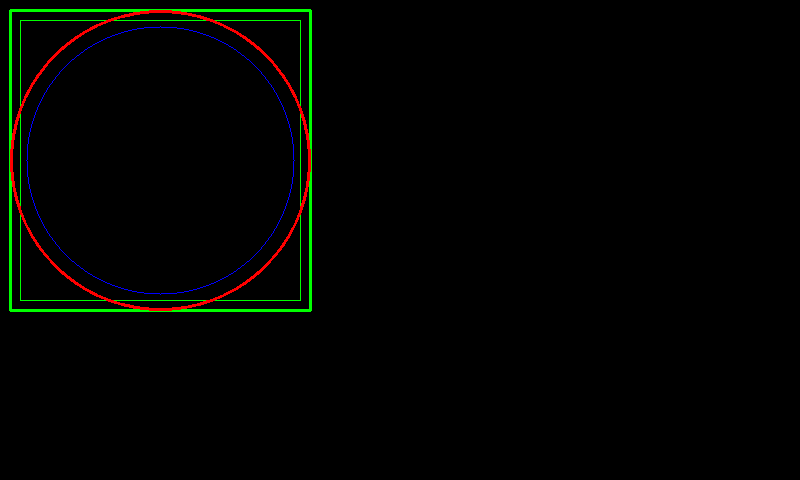

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import time

# colab 專用
import IPython.display as dp
from google.colab.patches import cv2_imshow

# 影片製作 -> 連續快速的播放圖片、清空畫面

# 僅限 Colab 使用
# 用迴圈設定變動的地方 -> (播放圖片->清空畫面)
for i in range(135):

  # 設定圖片畫面， i 是變動的地方
  image = np.full((480, 800, 3), (0,0,0), np.uint8)

  cv2.line(image, (10,10), (10,310), (0,255,0), 2)
  cv2.line(image, (10,310), (310,310), (0,255,0), 2)
  cv2.line(image, (310,310), (310,10), (0,255,0), 2)
  cv2.line(image, (310,10), (10,10), (0,255,0), 2)

  cv2.rectangle(image, (20,20), (300,300), (0,255,0), 1)

  cv2.circle(image, (160,160), i, (255,0,0), 1)
  cv2.circle(image, (160,160), i+15, (0,0,255), 2)

  # 清空畫面
  dp.clear_output(True)
  cv2_imshow(image)
  # 網頁處理時間
  time.sleep(0.3)


In [ ]:
# 儲存影片
# 先建立控制變數 = cv2.VideoWriter(檔案路徑, 格式, 每秒影格數, 大小(tuple類型 寬、高))
# 格式 -> cv2.VideoWriter_fourcc(*'編碼格式') # MP4V => MP4格式 XVID => AVI格式
video1 = cv2.VideoWriter('1.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 30, (800,480))

# 寫入影片的圖片
for i in range(100):

  image = np.full((300,500,3), (0,0,0), np.np.uint8)
  pil = Image.fromarray(image)
  ImageDraw.Draw(pil).text((160,160), 'Hello World', (255,255,255), ImageFont.truetype('DFT_TSSZ.TTC', 36))
  image = np.array(pil)
  
  video1.write(image)

# 停止寫入
video1.release()
  

In [ ]:
# 在瀏覽器用播放器播放影片 步驟 1
# 檔案類型轉換

!ffmpeg -i 'Ting.mp4' -vcodec libx264 'Ting1.mp4'

In [ ]:
import codecs
import base64

# 僅限 Colab
# 在瀏覽器上用播放器播放影片 步驟 2

with open('Ting1.mp4', 'rb') as file:
  # 開啟影片檔案後進行轉換成 base64 格式
  video_Ting = base64.b64encode(file.read()).decode()

# HTML 影片播放器
dp.HTML(f'<video src="data:video/mp4;base64,{video_Ting}" controls />')

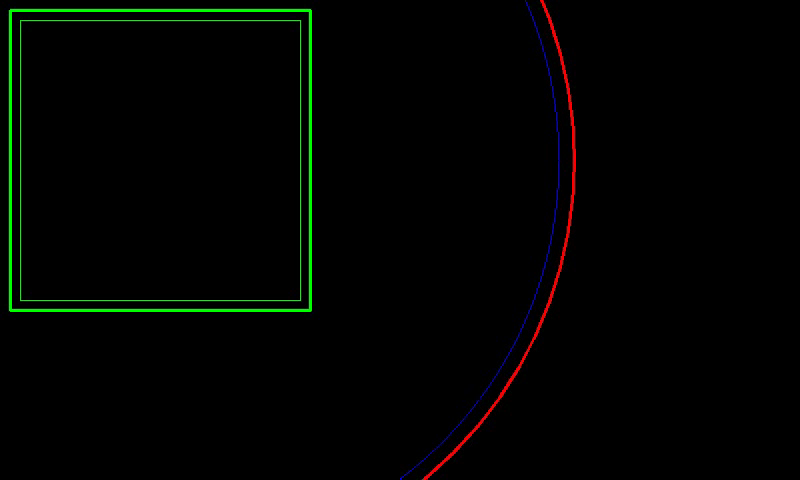

In [ ]:
# 影片讀取
# 圖像控制變數 = cv2.VideoCapture(來源)
cap = cv2.VideoCapture('Ting.mp4')

# 確認影片是否有讀到圖像
while video2.isOpened() == True:

# 變數一, 變數二 = 控制變數.read()
# 變數一 -> 如果有讀到畫面則返回True，否則Flase 
# 變數二 -> 讀到的畫面圖像
  ret, frame = cap.read()

  if ret == True:

    dp.clear_output(True)
    cv2_imshow(frame)
    time.sleep(0.3)

  else:
    break

In [ ]:
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import time

# colab 專用
import IPython.display as dp
from google.colab.patches import cv2_imshow


# 影片讀取
# 圖像控制變數 = cv2.VideoCapture(來源)
cap = cv2.VideoCapture('Ting.mp4')

# 圖像的資訊
# print("寬：",cap.get(1)) # 1 => 當前的影格
print("寬：",cap.get(3)) # 3 => 影像寬度
print("高：",cap.get(4)) # 4 => 影像高度
print("FPS：",cap.get(5)) # 5 => 每秒的影格數
print("總影格數：",cap.get(7)) # 7 => 影片的總影格數

# 跳轉至設定的影格 -> 控制變數.set(參數, 設定)
cap.set(1, 20)

# 確認影片是否有讀到圖像
while video2.isOpened() == True:

# 變數一, 變數二 = 控制變數.read()
# 變數一 -> 如果有讀到畫面則返回True，否則Flase 
# 變數二 -> 讀到的畫面圖像
  ret, frame = cap.read()

  if ret == True:

    print('當前的影格:'video2.get(1))

    # dp.clear_output(True)
    cv2_imshow(frame)
    # time.sleep(0.3)

  else:
    break